<a href="https://colab.research.google.com/github/syamkakarla98/Face_Recognition_Using_Convolutional_Neural_Networks/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference:https://github.com/syamkakarla98/Face_Recognition_Using_Convolutional_Neural_Networks

full documentation: https://www.grin.com/document/380686#:~:text=The%20main%20problem%20of%20face,images%20present%20in%20the%20database.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sklearn

In [ ]:
new_data = sklearn.datasets.fetch_olivetti_faces

NameError: ignored

#Importing essential libraries

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Uploading dataset from google drive

In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/combined-csv-files.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

pix-1  pix-2  pix-3  pix-4  pix-5  pix-6  pix-7  pix-8  pix-9  pix-10  ...  \
0    46   44.0   40.0  101.0  181.0  127.0   97.0   60.0   55.0    77.0  ...   
1    50   51.0   52.0   52.0   52.0   53.0   53.0   53.0   53.0    53.0  ...   
2    59   59.0   59.0   58.0   59.0   57.0   59.0   62.0   57.0   102.0  ...   
3    67   67.0   67.0   67.0   67.0   67.0   67.0   67.0   67.0    67.0  ...   
4    58   63.0   65.0   69.0   71.0   75.0   78.0   82.0   84.0    84.0  ...   

   pix-9992  pix-9993  pix-9994  pix-9995  pix-9996  pix-9997  pix-9998  \
0      19.0      20.0      22.0      23.0      29.0      35.0      31.0   
1      54.0      53.0      55.0      63.0      71.0      77.0      80.0   
2      49.0      50.0      52.0      55.0      59.0      60.0      60.0   
3      27.0       1.0       4.0       5.0       2.0      12.0      47.0   
4      22.0      22.0      22.0      23.0      25.0      32.0      43.0   

   pix-9999  pix-10000  class  
0      34.0       43.0    0.0  
1      81.0       87.0    0.0  
2      59.0       56.0    0.0  
3     128.0      128.0    0.0  
4      58.0       67.0    0.0  

[5 rows x 10001 columns]

In [ ]:
X = df.iloc[:, :100*100].values.reshape(-1, 100, 100, 1) 
y = df.iloc[:, -1].values

In [ ]:
X.shape

(2426, 100, 100, 1)

In [ ]:
y.shape

(2426,)

In [ ]:
# One Hot Encoding the labels
#y = to_categorical(y, num_classes= 1+ df.loc[:, 'class'].unique().shape[0])

In [ ]:
# random Image
q = np.random.randint(100*100)
plt.imshow(X[q][:,:,0], cmap='gray')
plt.title(f'Label-{np.argmax(y[q])}')
plt.axis('off')
plt.show()

#Data splitting (Train and test)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

Train Size - (2682, 100, 100, 1)
Test Size - (474, 100, 100, 1)


In [ ]:
# Artificially increase training set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

#Specify No of classes

In [ ]:
from datetime import datetime 


In [ ]:
from datetime import datetime 
num_classes = 3
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

#Building Restnet model 

##Importing libraries

In [ ]:
#Restnet model
import tensorflow as tf


In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [ ]:
from datetime import datetime 
num_classes = 5
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

##Building model

In [ ]:

def identity_block(x, filters, strides=1):
    x_in = x

    x = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters*4, kernel_size=(1, 1), strides=strides, padding='valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    x = tf.keras.layers.Add()([x, x_in])
    x = tf.keras.layers.Activation('relu')(x)

    return x


def convolutional_block(x, filters,strides=1):
    x_in = x

    x = tf.keras.layers.Conv2D(filters, (1, 1), strides=2)(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters*4, kernel_size=(1, 1), strides=strides, padding='valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    x_in = tf.keras.layers.Conv2D(filters*4, kernel_size=(1, 1), strides=2, padding='valid')(x_in)
    x_in = tf.keras.layers.BatchNormalization(axis=3)(x_in)

    x = tf.keras.layers.Add()([x, x_in])
    x = tf.keras.layers.Activation('relu')(x)
    return x


def ResNet50(input_shape=(64, 64, 3), classes=3):
    input_layer = tf.keras.Input(input_shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(input_layer)

    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = convolutional_block(x, 64)
    x = identity_block(x,64)
    x = identity_block(x,64)

    x = convolutional_block(x, 128)
    for i in range(3):
        x = identity_block(x, 128)

    x = convolutional_block(x, 256)
    for i in range(5):
        x = identity_block(x, 256)

    x = convolutional_block(x,512)
    x = identity_block(x, 512)
    x = identity_block(x,512)


    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output_layer = tf.keras.layers.Dense(classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer, name='ResNet50')

    return model

##Model summary

In [ ]:
model = ResNet50((100,100,1),classes=5)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 50, 50, 64)  256         ['conv2d[0][0]']          

##Learning rate, optimizer and model compiler

In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


##Run the Model

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=50, 
          validation_data=(X_test, y_test))

Epoch 1/50
9/9 [==============================] - 33s 582ms/step - loss: 4.3339 - accuracy: 0.2090 - val_loss: 25271.7422 - val_accuracy: 0.1896
Epoch 2/50
9/9 [==============================] - 2s 202ms/step - loss: 2.5460 - accuracy: 0.2250 - val_loss: 112898.8594 - val_accuracy: 0.1896
Epoch 3/50
9/9 [==============================] - 2s 204ms/step - loss: 2.2083 - accuracy: 0.2711 - val_loss: 7192.2183 - val_accuracy: 0.2143
Epoch 4/50
9/9 [==============================] - 2s 204ms/step - loss: 1.9044 - accuracy: 0.2997 - val_loss: 15593.8516 - val_accuracy: 0.2033
Epoch 5/50
9/9 [==============================] - 2s 207ms/step - loss: 1.7009 - accuracy: 0.3254 - val_loss: 297.1203 - val_accuracy: 0.2115
Epoch 6/50
9/9 [==============================] - 2s 202ms/step - loss: 2.1627 - accuracy: 0.3249 - val_loss: 13932.3477 - val_accuracy: 0.1868
Epoch 7/50
9/9 [==============================] - 2s 208ms/step - loss: 2.0842 - accuracy: 0.2847 - val_loss: 8239.7891 - val_accuracy: 0

#InceptionV3 model

##Importing libraries

In [ ]:
from abc import ABCMeta
import tensorflow as tf
from tensorflow import keras
import numpy as np

from inception_blocks import Conv2d_Bn, inception_block, \
    inception_A, reduction_A, inception_B, reduction_B, inception_C

import tensorflow as tf
import numpy as np


In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [ ]:
from datetime import datetime 
num_classes = 5
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

##Build model

In [ ]:
class InceptionV3(tf.keras.Model):
    def __init__(self,shape):
        super(InceptionV3,self).__init__()
        #self.inputs = tf.compat.v1.keras.layers.Input(shape=shape)
        self.block_1 = tf.keras.Sequential([inception_block()])
        self.block_A = tf.keras.Sequential([
            inception_A(),
            inception_A(),
            inception_A(),

            reduction_A()
        ])
        self.block_B = tf.keras.Sequential([
            inception_B(),
            inception_B(),
            inception_B(),
            inception_B(),

            reduction_B()
        ])
        self.block_C = tf.keras.Sequential([
            inception_C(),
            inception_C()
        ])
        self.global_avg = tf.keras.layers.GlobalAvgPool2D()
        #self.fc1 = tf.keras.layers.Dense(2048,activation='relu')
        self.fc2 = tf.keras.layers.Dense(1000,activation='softmax')

    def call(self,shape,training=None,**kwargs):
        #x = self.inputs
        x = self.block_1(shape)
        x = self.block_A(x)
        x = self.block_B(x)
        x = self.block_C(x)
        x = self.global_avg(x,training=training)
        #x = self.fc1(x,training=training)
        x = self.fc2(x,training=training)
        return x



##Model summary

In [ ]:
model = InceptionV3((100,100,1))
model.build((1,100,100,1))
model.summary()

##Learning rate, optimizer and model compiler

In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


##Run the model

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(X_test, y_test))

Epoch 1/20
9/9 [==============================] - 13s 328ms/step - loss: 0.6930 - accuracy: 0.8303 - val_loss: 38.1365 - val_accuracy: 0.2857
Epoch 2/20
9/9 [==============================] - 2s 215ms/step - loss: 0.1822 - accuracy: 0.9471 - val_loss: 167.1550 - val_accuracy: 0.2225
Epoch 3/20
9/9 [==============================] - 2s 209ms/step - loss: 0.1192 - accuracy: 0.9617 - val_loss: 577.8966 - val_accuracy: 0.1896
Epoch 4/20
9/9 [==============================] - 2s 215ms/step - loss: 0.1662 - accuracy: 0.9661 - val_loss: 6.3345 - val_accuracy: 0.3214
Epoch 5/20
9/9 [==============================] - 2s 211ms/step - loss: 0.3002 - accuracy: 0.9137 - val_loss: 3.5958 - val_accuracy: 0.3929
Epoch 6/20
9/9 [==============================] - 2s 211ms/step - loss: 0.2181 - accuracy: 0.9428 - val_loss: 4.8416 - val_accuracy: 0.4231
Epoch 7/20
9/9 [==============================] - 2s 211ms/step - loss: 0.0656 - accuracy: 0.9821 - val_loss: 5.5973 - val_accuracy: 0.4093
Epoch 8/20
9/9

##Model image 
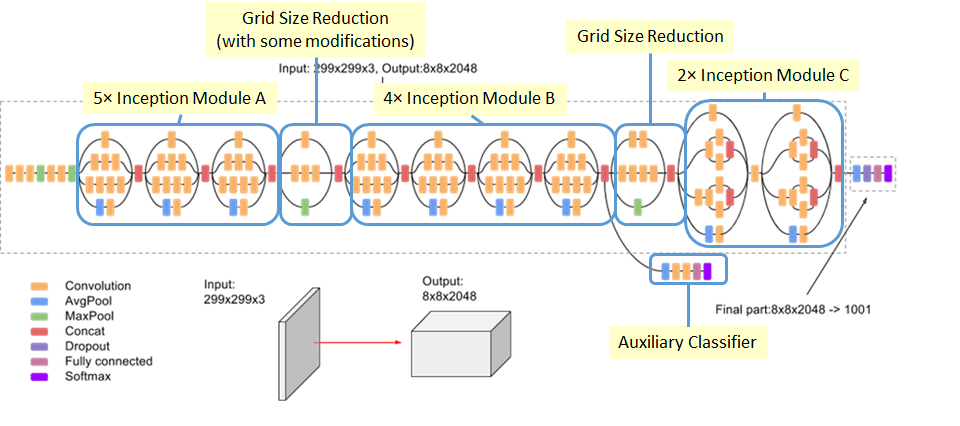

#VGGNets models 

##VGG16

###Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os


In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [ ]:
from datetime import datetime 
num_classes = 5
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

###Building VGG16 model

In [ ]:
def conv_block(filters,inputs,flag=False):

    if not flag:
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), strides=1,
                               activation='relu', padding ='same')(inputs)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), strides=1,
                               activation='relu', padding ='same')(x)
        x = tf.keras.layers.MaxPooling2D((5, 5), strides=2, padding='same')(x)

        return x

    if flag:
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, activation='relu',
                                   padding='same')(inputs)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, activation='relu',
                                   padding='same')(x)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, activation='relu',
                                   padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((5,5), strides=2,padding ='same')(x)

        return x


def VGG16(input_shape,num_classes):

    input_layer = tf.keras.layers.Input(input_shape)
    x = conv_block(64,input_layer,False)
    x = conv_block(128, x, False)
    x = conv_block(256, x, True)
    x = conv_block(512, x, True)
    x = conv_block(512, x, True)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096,activation='relu')(x)
    x = tf.keras.layers.Dense(4096,activation='relu')(x)
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    vgg_model = tf.keras.models.Model(inputs=input_layer,outputs=output_layer)
    return vgg_model




###Model summary

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_53 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_54 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_55 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_56 (Conv2D)          (None, 50, 50, 128)       147584    
                                                             

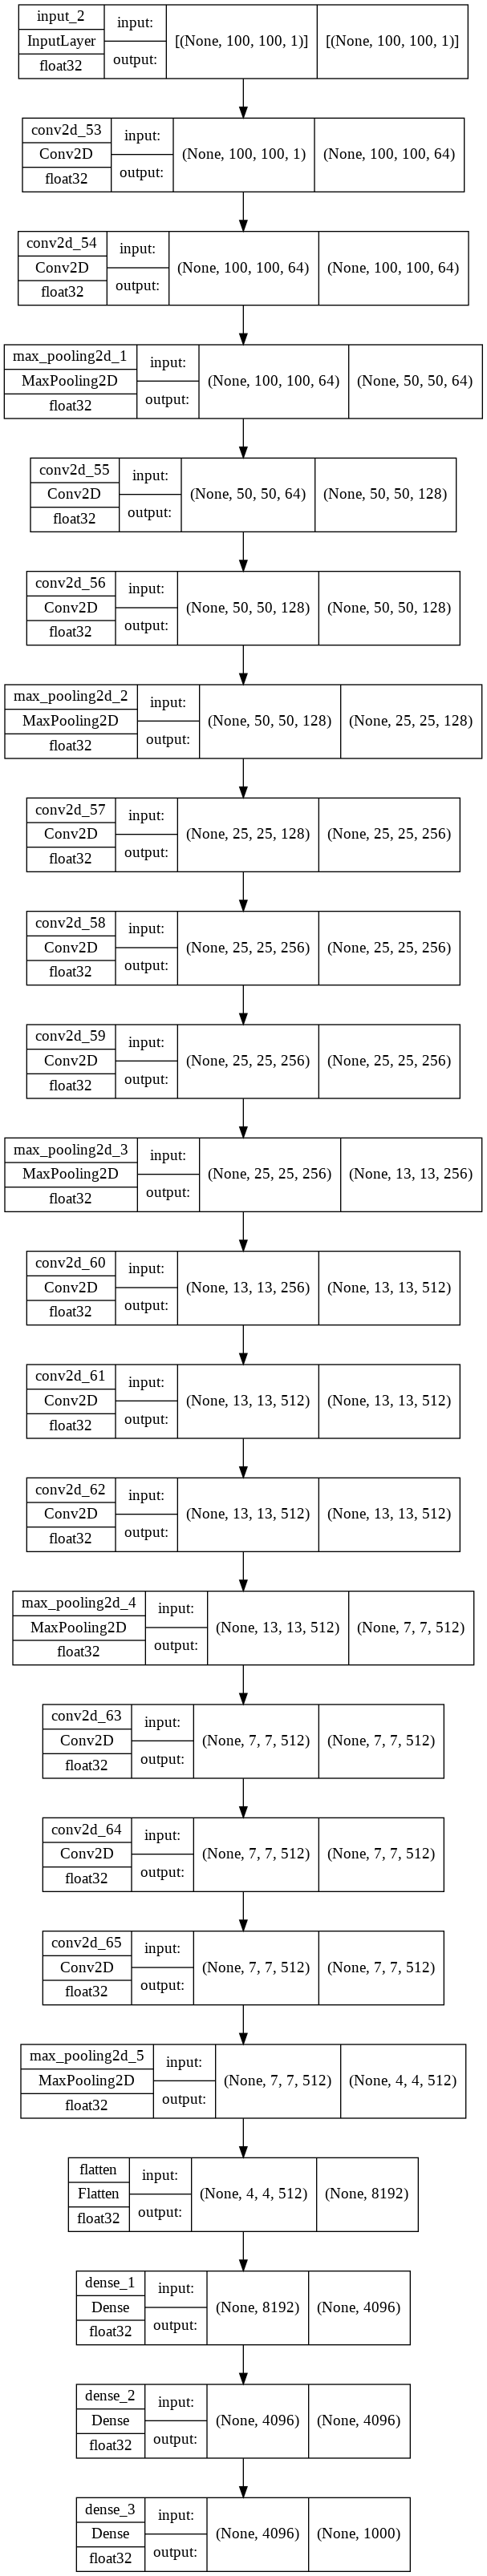

In [ ]:
model = VGG16((100,100,1),1000)
model.summary()
tf.keras.utils.plot_model(model,to_file="vgg16.png",
                          show_shapes=True,show_dtype=True,
                          show_layer_names=True)


###Learning rate, optimizer and model compiler

In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


###Run the model

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(X_test, y_test))

###Model image 
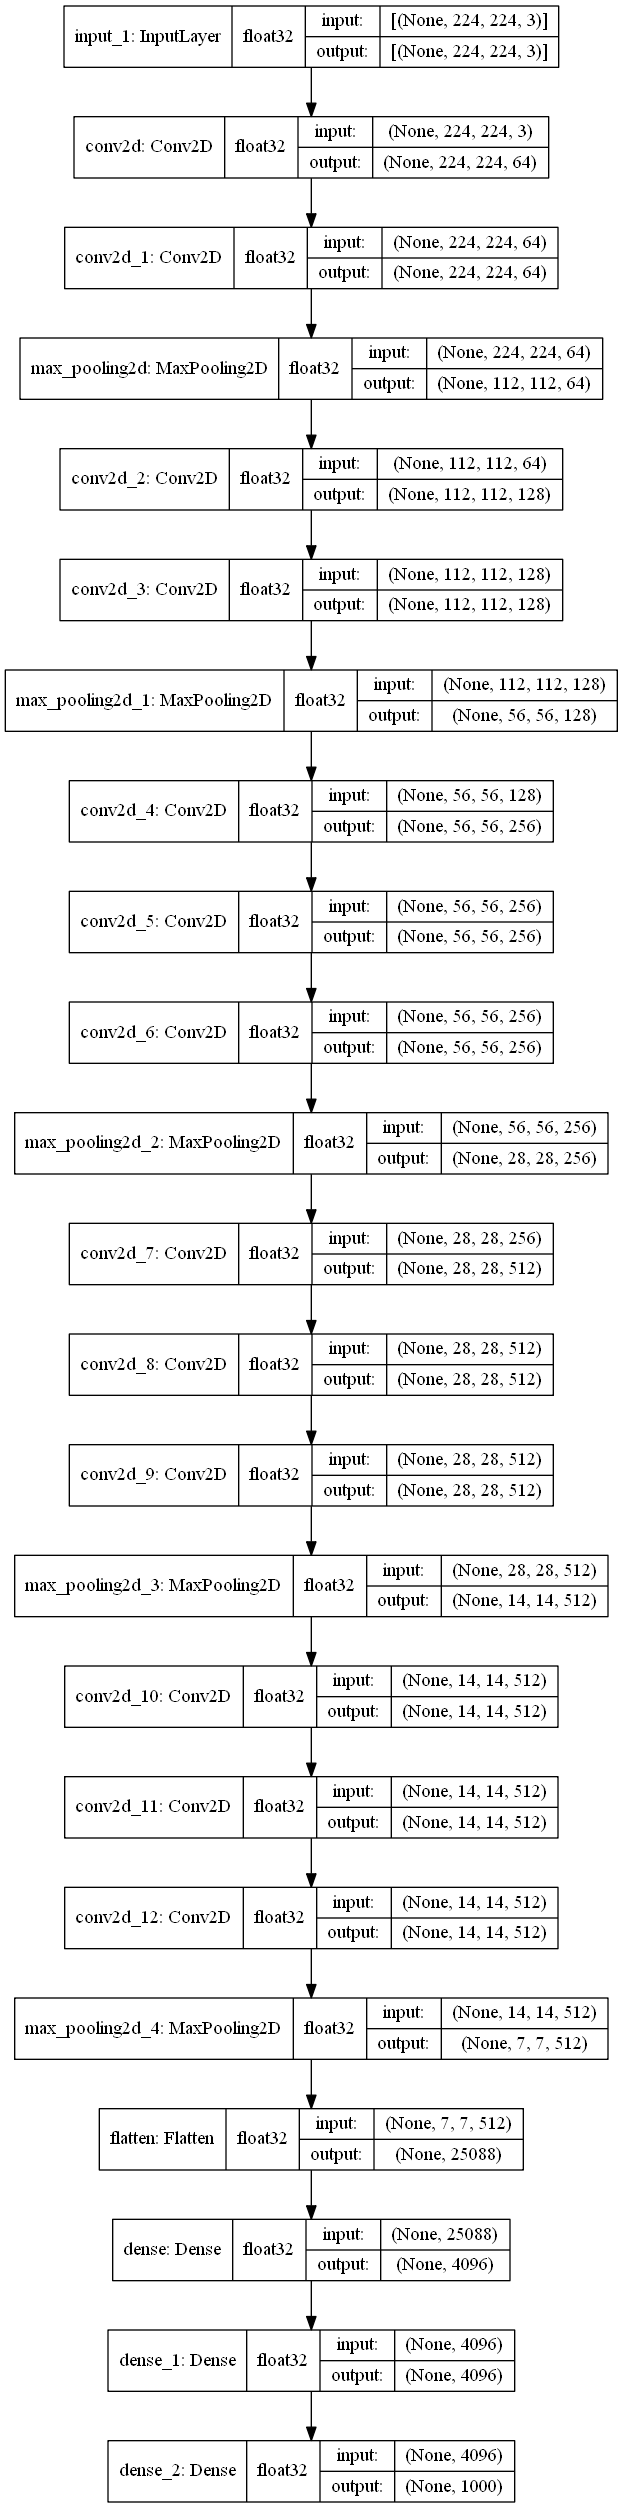

##VGG19

###Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [ ]:
from datetime import datetime 
num_classes = 5
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

###Building model

In [ ]:


def conv_block(filters, inputs, flag=False):

    if not flag:
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), activation='relu',
                               padding='same')(inputs)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), activation='relu',
                               padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((5,5),strides=2, padding='same')(x)

        return x

    if flag:
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu',
                                   padding='same')(inputs)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu',
                                   padding='same')(x)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu',
                                   padding='same')(x)
        x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu',
                                   padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((5, 5),strides=2, padding='same')(x)

        return x

def VGG19(input_shape):

    input_layer = tf.keras.layers.Input(input_shape)
    x = conv_block(64,input_layer,False)
    x = conv_block(128,x,False)
    x = conv_block(256,x,True)
    x = conv_block(512,x,True)
    x = conv_block(512,x,True)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096,activation='relu')(x)
    x = tf.keras.layers.Dense(4096,activation='relu')(x)
    output_layer = tf.keras.layers.Dense(1000,activation='softmax')(x)

    vgg_model = tf.keras.models.Model(inputs=input_layer,outputs=output_layer)
    return vgg_model



###Model summary

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_66 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_67 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_68 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_69 (Conv2D)          (None, 50, 50, 128)       147584    
                                                           

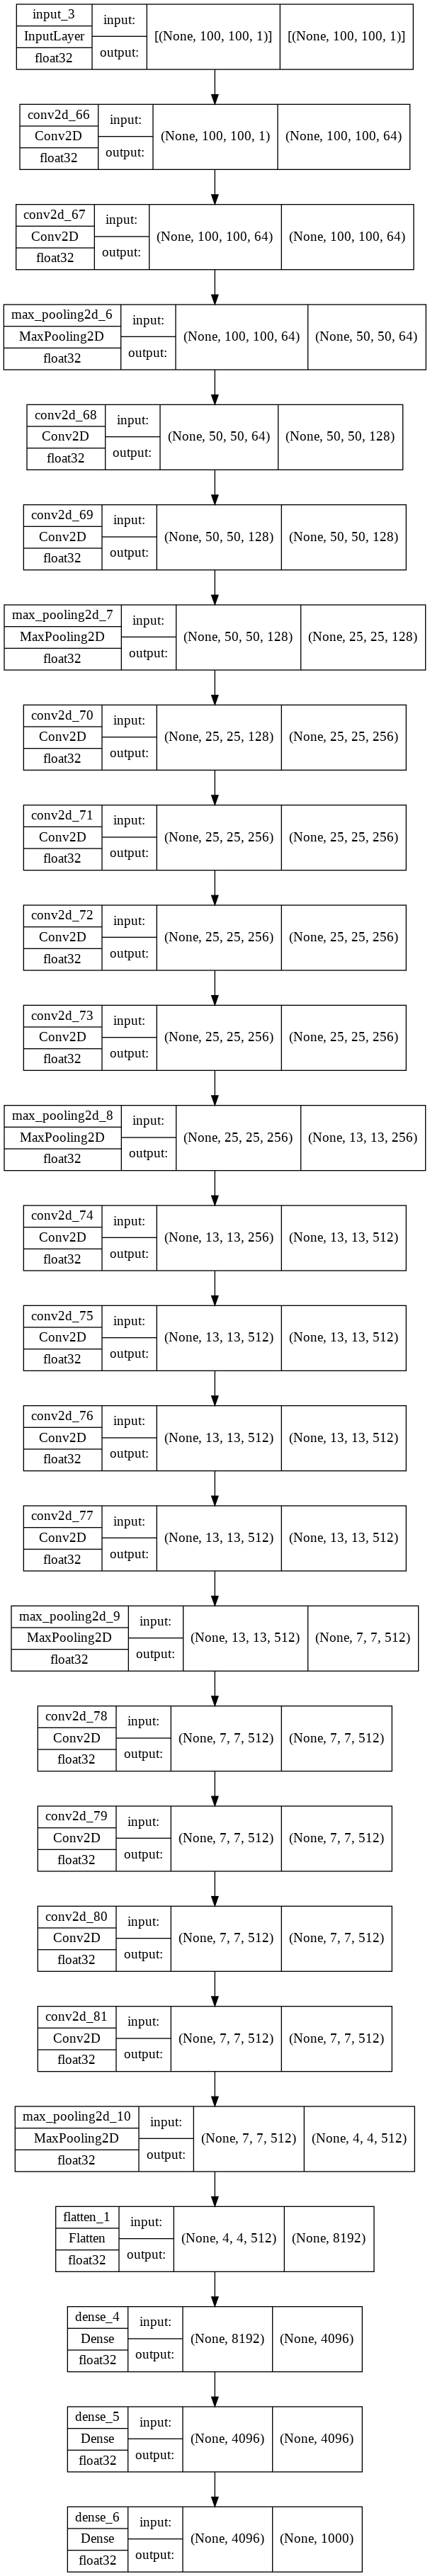

In [ ]:
model = VGG19((100,100,1))
model.summary()
tf.keras.utils.plot_model(model,to_file="vgg19.png",
                          show_shapes=True,show_dtype=True,
                          show_layer_names=True)

###Learning rate, optimizer and model compiler




In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


###Run the model

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(X_test, y_test))

###Model image
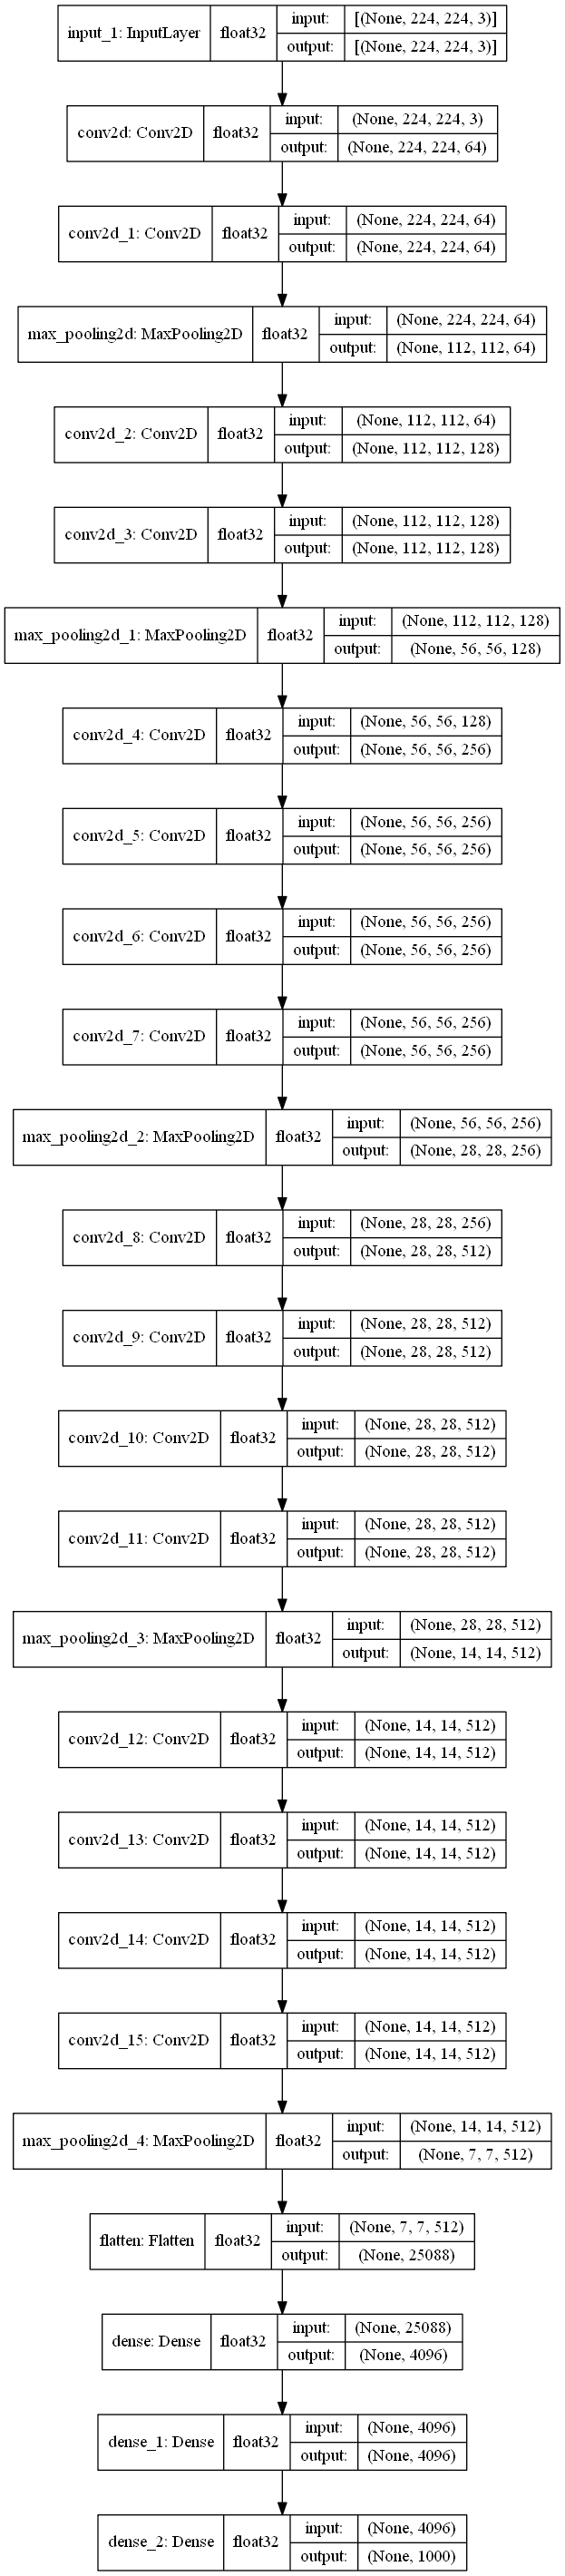

#Xception

##Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [ ]:
from datetime import datetime 
num_classes = 5
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

##Building model

In [ ]:


def conv_block(inputs, filters, strides=1):
    x = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), strides=2)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    return x

def separable_conv_block(x, filters, activation=None):
    if activation:
        x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.SeparableConv2D(filters, (3,3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    if not activation:
        x = tf.keras.layers.Activation('relu')(x)
    return x

def middle_block(inputs,filters):
    x_in = inputs

    x = separable_conv_block(inputs, filters, activation=True)
    x = separable_conv_block(x, filters, activation=True)
    x = separable_conv_block(x, filters, activation=True)

    output = tf.keras.layers.add([x, x_in])
    return output

def entry_block(inputs,filters,activation=True,first=False):
    conv1_1 = tf.keras.layers.Conv2D(filters,kernel_size=(1,1),strides=2,padding='same')(inputs)
    conv1_1 = tf.keras.layers.BatchNormalization()(conv1_1)

    x = separable_conv_block(inputs,filters,activation=activation)
    x = separable_conv_block(x, filters,activation=True)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)

    add_layer = tf.keras.layers.Add()([x,conv1_1])
    return add_layer

def Xception(num_classes,input_shape=(299,299,3)):
    input_layer = tf.keras.Input(input_shape)

    x = conv_block(input_layer,32,strides=2)
    x = conv_block(x,64)
    x = entry_block(x,128,activation=False)
    x = entry_block(x,256)
    x = entry_block(x,728)

    for i in range(8):
        x = middle_block(x,728)

    x_new = tf.keras.layers.Conv2D(1024,kernel_size=(1,1),strides=2,padding='same')(x)
    x_new = tf.keras.layers.BatchNormalization()(x_new)

    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.SeparableConv2D(728,kernel_size=(3,3),padding='same')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.SeparableConv2D(1024,kernel_size=(3,3),padding='same')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    add_layer = tf.keras.layers.Add()([x, x_new])

    add_layer = separable_conv_block(add_layer,1536,activation=False)
    add_layer = separable_conv_block(add_layer,2048,activation=False)
    add_layer = tf.keras.layers.GlobalAveragePooling2D()(add_layer)

    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(add_layer)
    model = tf.keras.models.Model(inputs=input_layer,outputs=output_layer)
    return model



##Model summary

In [ ]:
model = Xception(1000)
model.summary()

##Learning rate, optimizer and model compiler




In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


##Run the model

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(X_test, y_test))

##Model image 
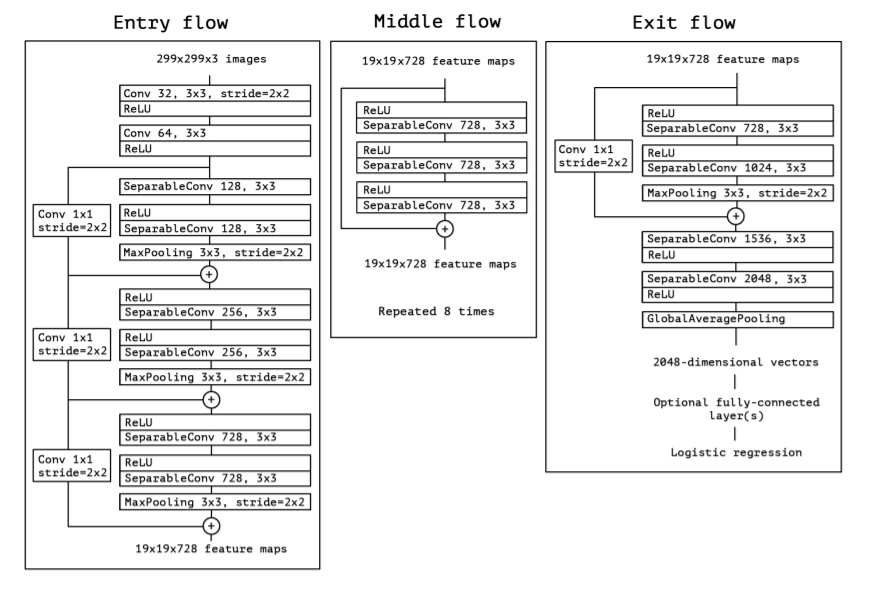

#CNN custom (Modified) model

In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/tech_guy.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

Train Size - (2682, 100, 100, 1)
Test Size - (474, 100, 100, 1)


In [ ]:
from datetime import datetime 
num_classes = 3
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

In [ ]:
model = Sequential(name = model_name)

model.add(Conv2D(64, kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(l=0.01), input_shape=(100, 100, 1)))
#model.add(BatchNormalization()) #----------------
#model.add(Conv2D(64, kernel_size=3, activation='relu'))
#model.add(BatchNormalization()) #----------------
#model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
#model.add(BatchNormalization()) #----------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2)) #----------------

#model.add(Conv2D(128, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, kernel_regularizer = tf.keras.regularizers.l2(l=0.01),padding='same', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.summary()

## CNN model 

In [ ]:
#try the old cnn model 
model = Sequential(name = model_name)

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #----------------

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "Face_trained_model_08_12_31_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 98, 98, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_19 (Bat  (None, 96, 96, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_20 (Bat  (None, 9

In [ ]:
df.columns

In [ ]:
df.type

In [ ]:
df.columns = df.columns.astype(str)

In [ ]:
df.columns.map(type)

In [ ]:
train_set = train_datagen.flow_from_dataframe(df,
                                             # directory="./isic_images",
                                             
                                              x_col=df.columns.astype(str)[:-1],
                                              y_col="class",
                                              target_size=(100, 100),
                                              batch_size=32,
                                              class_mode='sparse',
                                              )

##Learning rate, optimizer anad model compiler

In [ ]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


In [ ]:
y_train

array([2., 1., 1., ..., 1., 1., 0.])

In [ ]:
epochs = 50
batch_size = 256
history = model.fit_generator(X_train, y_train, batch_size=batch_size,
                              steps_per_epoch= X_train.shape[0]//batch_size,
                              epochs=epochs,
                              #validation_data=valid_datagen.flow(X_test, y_test),
                              #validation_steps=50,
                              verbose = 1,
                              callbacks=[learning_rate_reduction, es, ch, tensorboard_callback])

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
X_train

In [ ]:
y_train

array([2., 1., 1., ..., 1., 1., 0.])

##Run the model 

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(X_test, y_test))

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(np.array(X_test, dtype=np.float),np.array(Y_test, dtype=np.float)))

#validation_data=(np.array(X_test, dtype=np.float),np.array(Y_test, dtype=np.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


ValueError: ignored

In [ ]:
history= model.fit(X_train, y_train, batch_size=256, epochs=20, 
          validation_data=(np.array(X_test, dtype=str),np.array(y_test, dtype=str)))

ValueError: ignored

#Accuracy and Loss results

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {acc*100}')

12/12 [==============================] - 2s 82ms/step - loss: 6.1641 - accuracy: 0.2363
Loss: 6.164063930511475
Accuracy: 23.62637370824814


In [ ]:
#save the model in .h5 format
model.save("my_h5_model.h5")

##Plot the train_acc and val_acc

In [ ]:
# Plot training & test accuracy values
train_acc = plt.plot(history.history['acc'])
val_acc = plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Plot the loss and val_loss

In [ ]:
# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/

##  precision, recall, f1-score , support Matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test),axis=1)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       388
           2       1.00      0.99      1.00       398
           3       1.00      1.00      1.00       372
           4       1.00      1.00      1.00       347

    accuracy                           1.00      1505
   macro avg       1.00      1.00      1.00      1505
weighted avg       1.00      1.00      1.00      1505



## confusion_matrix

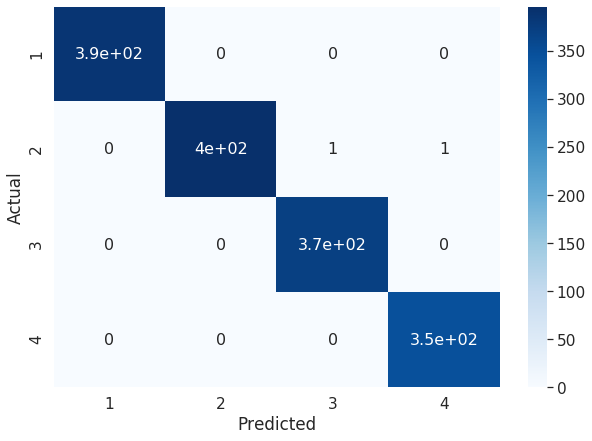

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

##f1_score, (y_true, y_pred) 
##precision_score, (y_true, y_pred)
##recall_score, (y_true, y_pred)

In [ ]:
print(f1_score(y_true, y_pred, average="macro")*100)
print(precision_score(y_true, y_pred, average="macro")*100)
print(recall_score(y_true, y_pred, average="macro")*100) 

99.86749943780711
99.8611367908539
99.87437185929649


##Headtmap

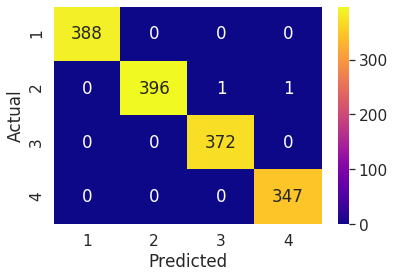

In [ ]:
sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
def AA_andEachClassAccuracy(confusion_matrix):
    from operator import truediv
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

def reports (nn_model, X_test,y_test):
    #start = time.time()
    Y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start
    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['1', '2','3','4'])
    target_names=['1', '2','3','4']
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = nn_model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy, oa*100, '\n'.join([' : '.join(map(str, i)) for i in zip(target_names, each_acc*100)]), aa*100, kappa*100



classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(model, X_test, y_test)
classification = str(classification)
confusion = str(confusion)
file_name = "Face_Classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('\nTest loss: {}%'.format(Test_loss))
    x_file.write('\n')
    x_file.write('Test accuracy: {}%'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('Kappa accuracy: {}%'.format(kappa))
    x_file.write('\n')
    x_file.write('Overall accuracy: {}%'.format(oa))
    x_file.write('\n')
    x_file.write('Average accuracy: {}%'.format(aa))
    x_file.write('\n\n')
    x_file.write('Classwise Accuracy: \n{}'.format(each_acc))
    x_file.write('\n\n')
    x_file.write('Classification Report:\n{}'.format(classification))
    x_file.write('\n\n')
    x_file.write('Confusion Matrix:\n{}'.format(confusion))

1505/1505 [==============================] - 1s 659us/sample - loss: 0.0193 - acc: 0.9987


In [ ]:
ls

 batch_normalization_1.png           'HydCon Work.gdoc'
 batch_normalization_2.png            image_at_epoch_0001.png
 batch_normalization_3.png            image_at_epoch_0002.png
 batch_normalization_4.png            image_at_epoch_0003.png
 batch_normalization_5.png            image_at_epoch_0004.png
 batch_normalization_6.png            image_at_epoch_0005.png
 batch_normalization.png              image_at_epoch_0006.png
 CNN.ipynb                            KNNC.ipynb
 conv2d_1.png                         logs/
 conv2d_2.png                         max_pooling2d_1.png
 conv2d_3.png                         max_pooling2d_2.png
 conv2d_4.png                         max_pooling2d.png
 conv2d_5.png                         model_history.csv
 conv2d_6.png                         model.json
 conv2d.png                           model.png
 Dataset.csv                          models/
 Dataset_In_3D.csv                    model_with_shapes.png
'Dataset_In_3D_using_KPCA(rbf).csv'   network.gv

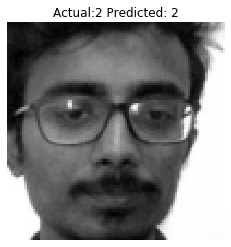

In [ ]:
# Verify
rand_n = np.random.randint(X_test.shape[0])
plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
plt.axis('off')
plt.show()

In [ ]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
      plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

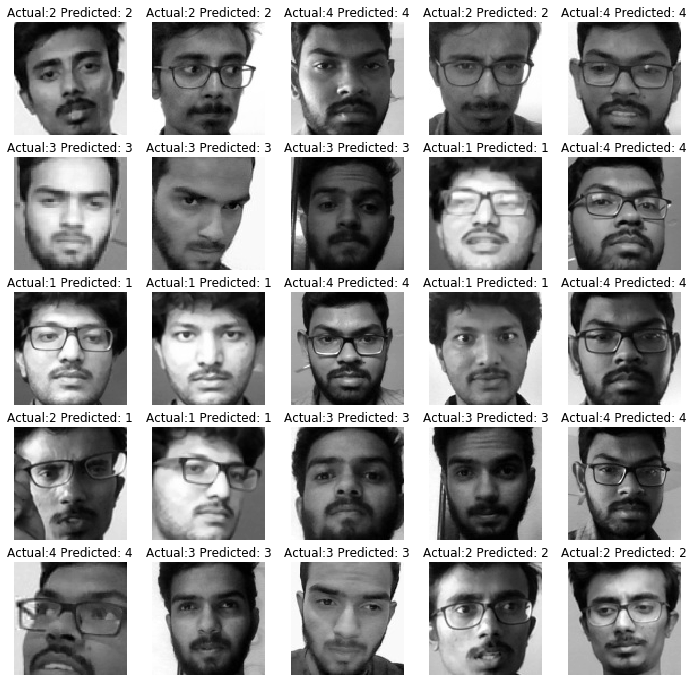

In [ ]:
plot_predictions()

In [ ]:
# serialize weights to HDF5
model.save(model_name+".h5")
print("Model Saved to disk")

Model Saved to disk


In [ ]:
# Loding model from disk
from tensorflow.keras.models import load_model
model1 = load_model('models/Face_trained_model_04_12_16.h5')

In [ ]:
loss, acc = model1.evaluate(valid_datagen.flow(X_test, y_test))

48/48 [==============================] - 2s 38ms/step - loss: 0.0057 - acc: 0.9987


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model1.predict(X_test), axis=1)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       388
           2       0.21      0.69      0.32       398
           3       0.26      0.14      0.18       372
           4       0.00      0.00      0.00       347

    accuracy                           0.22      1505
   macro avg       0.12      0.21      0.13      1505
weighted avg       0.12      0.22      0.13      1505



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ls models/

Face_trained_model_04_12_16.h5


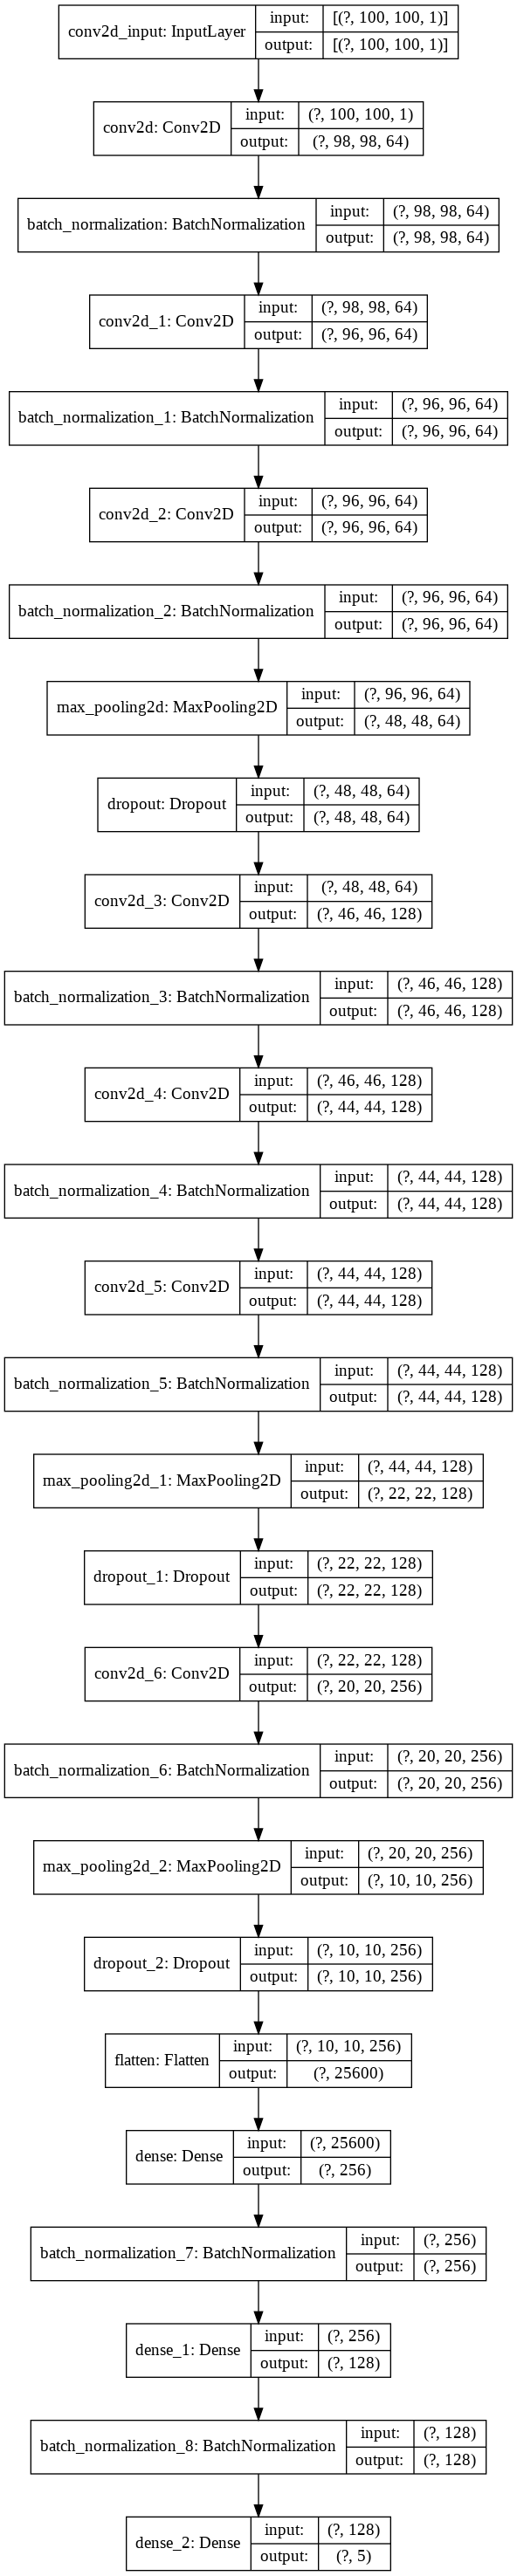

In [ ]:
tf.keras.utils.plot_model(
    model1,
    to_file='model_with_shapes.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Intermediate layer visualization of the CNN

In [ ]:
model1.summary()

Model: "Face_trained_model_04_12_16_.h5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None,

In [ ]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model1.layers[:20]]
activation_model = Model(inputs=model1.input, outputs=layer_outputs)

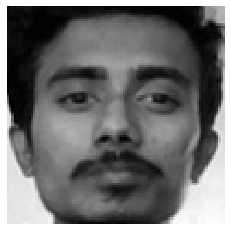

In [ ]:
plt.imshow(X_test[28][:,:,0], cmap='gray');
plt.axis('off');

In [ ]:
activations = activation_model.predict(X_test[28].reshape(-1, 100, 100, 1))

In [ ]:
count =0
for layer in activations:
  count+=1
  print('Layer:%2d    Shape: %s ' %(count, str(layer.shape)))

Layer: 1    Shape: (1, 98, 98, 64) 
Layer: 2    Shape: (1, 98, 98, 64) 
Layer: 3    Shape: (1, 96, 96, 64) 
Layer: 4    Shape: (1, 96, 96, 64) 
Layer: 5    Shape: (1, 96, 96, 64) 
Layer: 6    Shape: (1, 96, 96, 64) 
Layer: 7    Shape: (1, 48, 48, 64) 
Layer: 8    Shape: (1, 48, 48, 64) 
Layer: 9    Shape: (1, 46, 46, 128) 
Layer:10    Shape: (1, 46, 46, 128) 
Layer:11    Shape: (1, 44, 44, 128) 
Layer:12    Shape: (1, 44, 44, 128) 
Layer:13    Shape: (1, 44, 44, 128) 
Layer:14    Shape: (1, 44, 44, 128) 
Layer:15    Shape: (1, 22, 22, 128) 
Layer:16    Shape: (1, 22, 22, 128) 
Layer:17    Shape: (1, 20, 20, 256) 
Layer:18    Shape: (1, 20, 20, 256) 
Layer:19    Shape: (1, 10, 10, 256) 
Layer:20    Shape: (1, 10, 10, 256) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


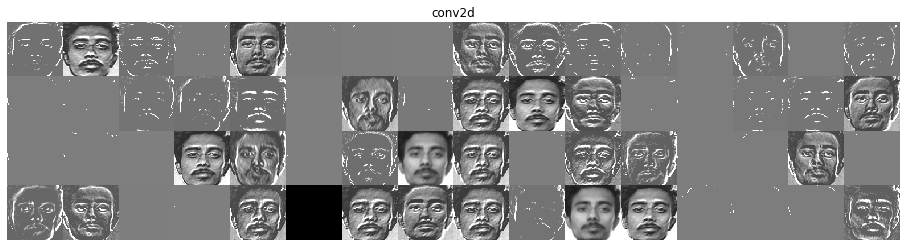

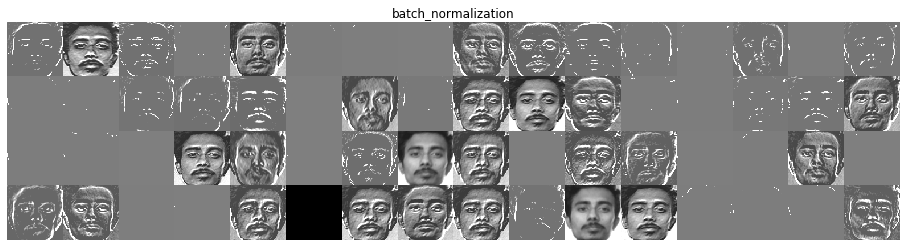

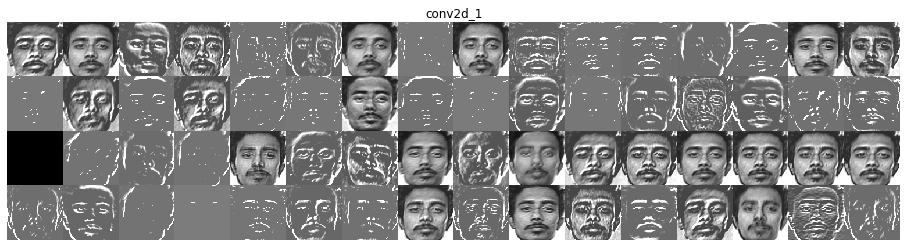

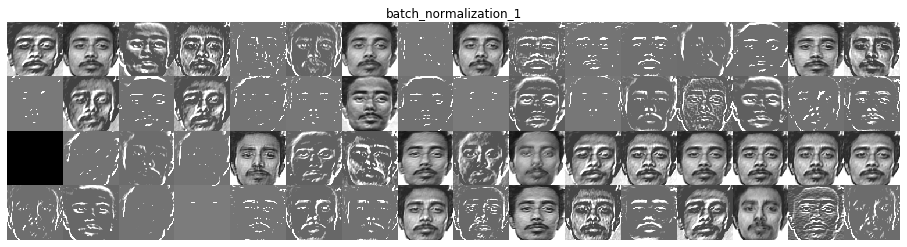

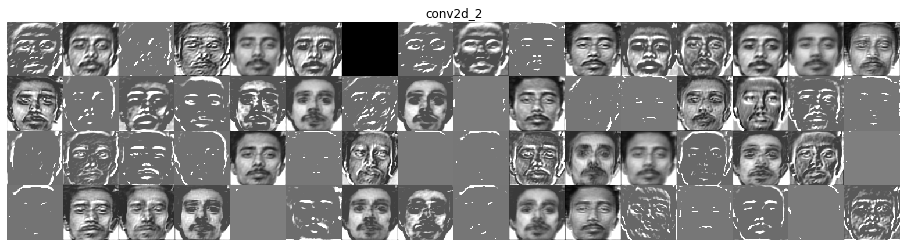

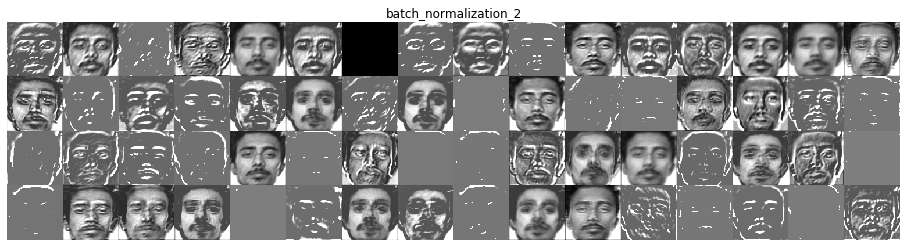

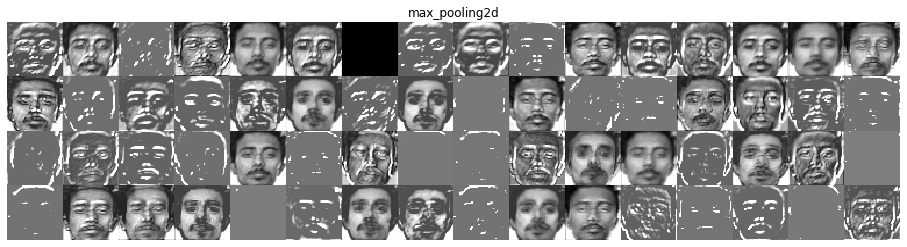

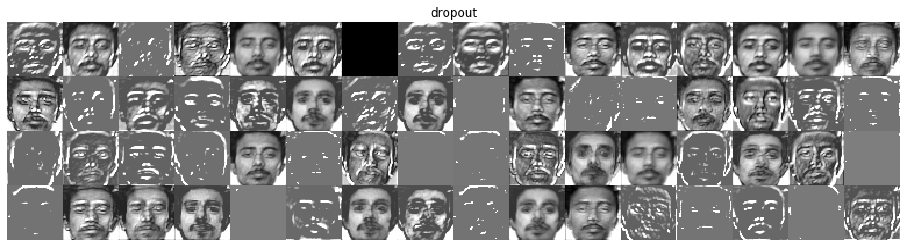

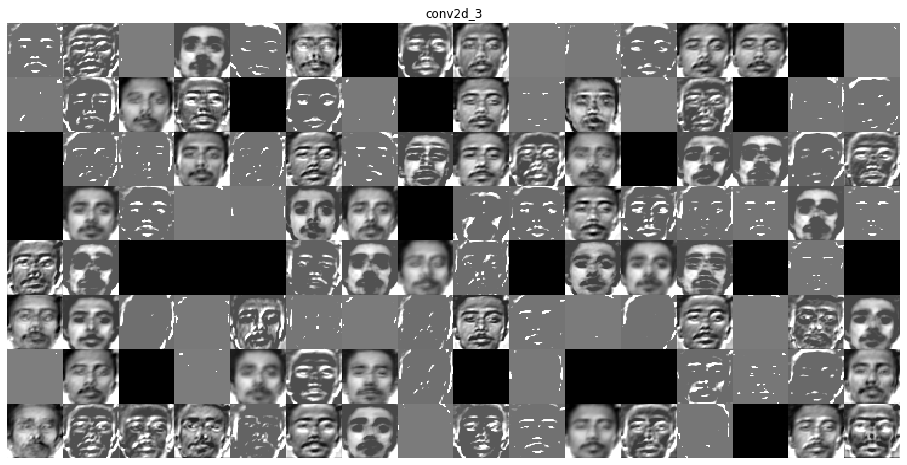

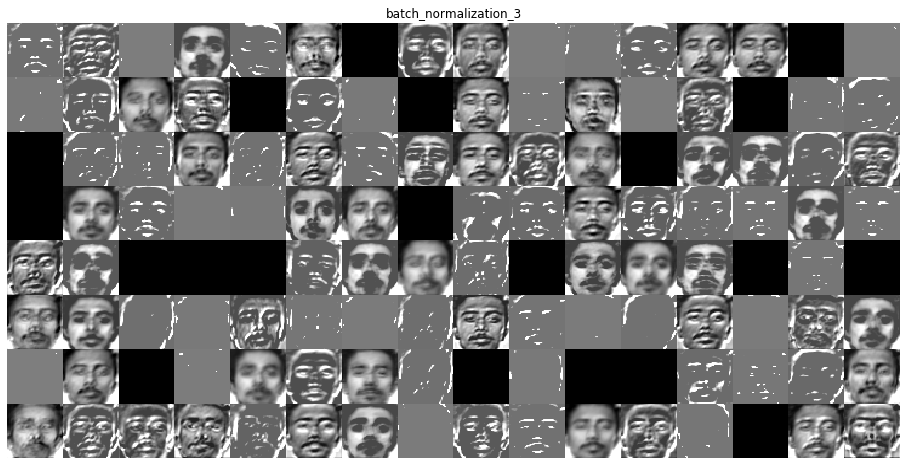

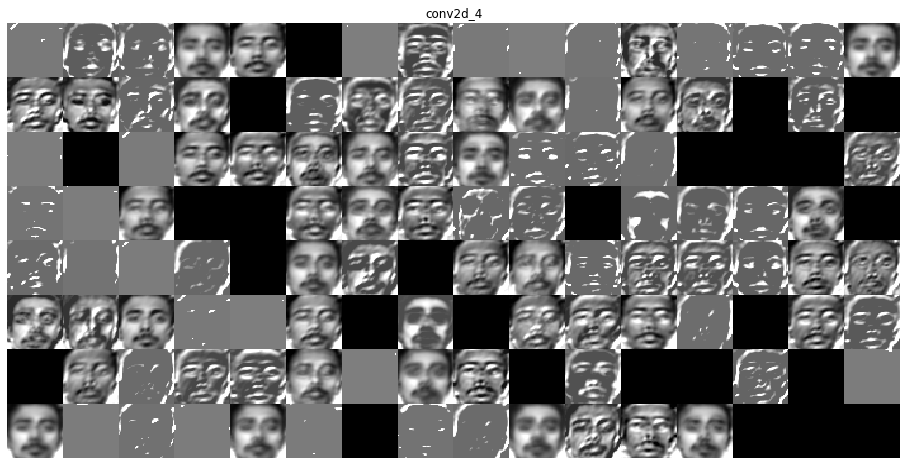

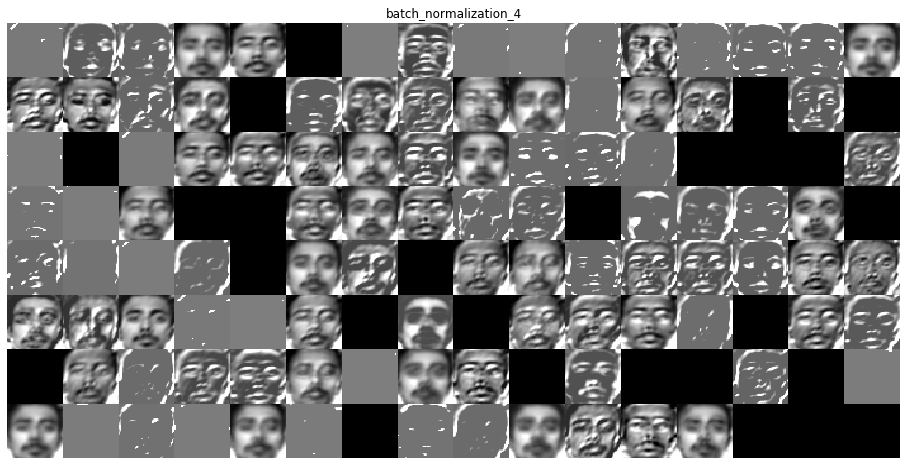

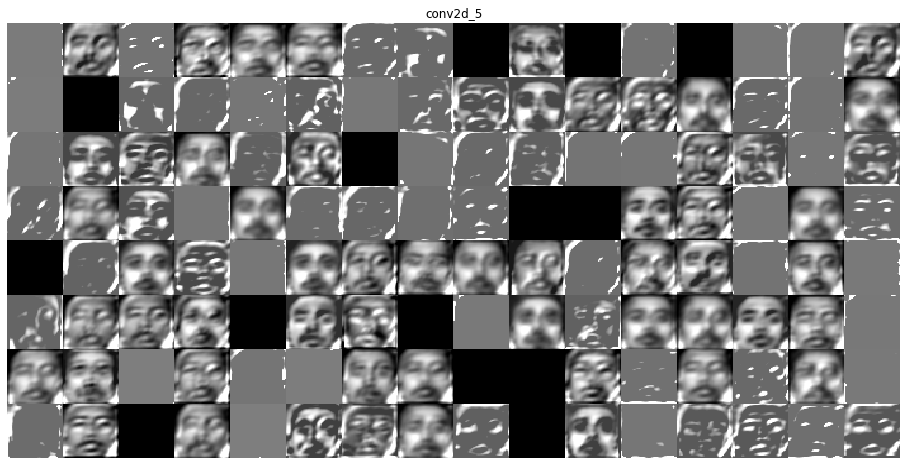

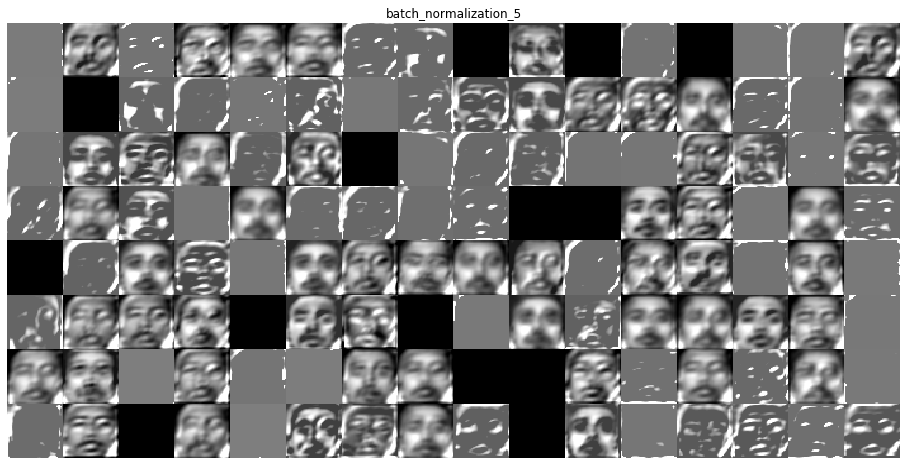

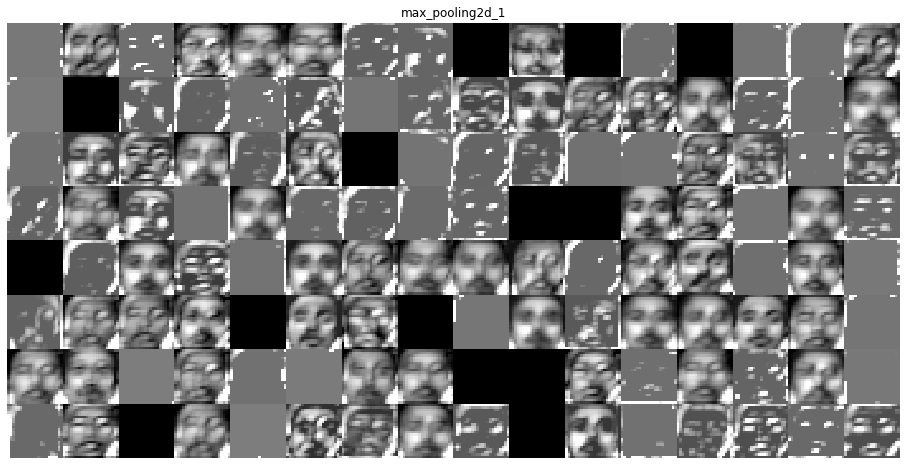

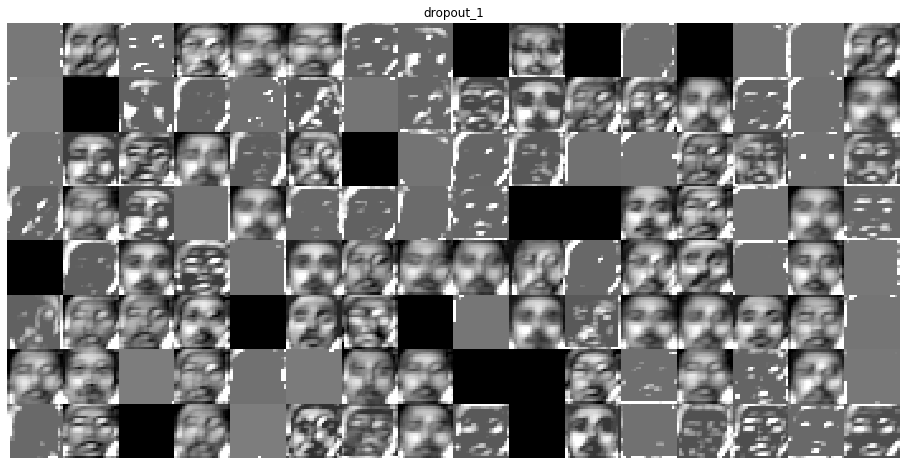

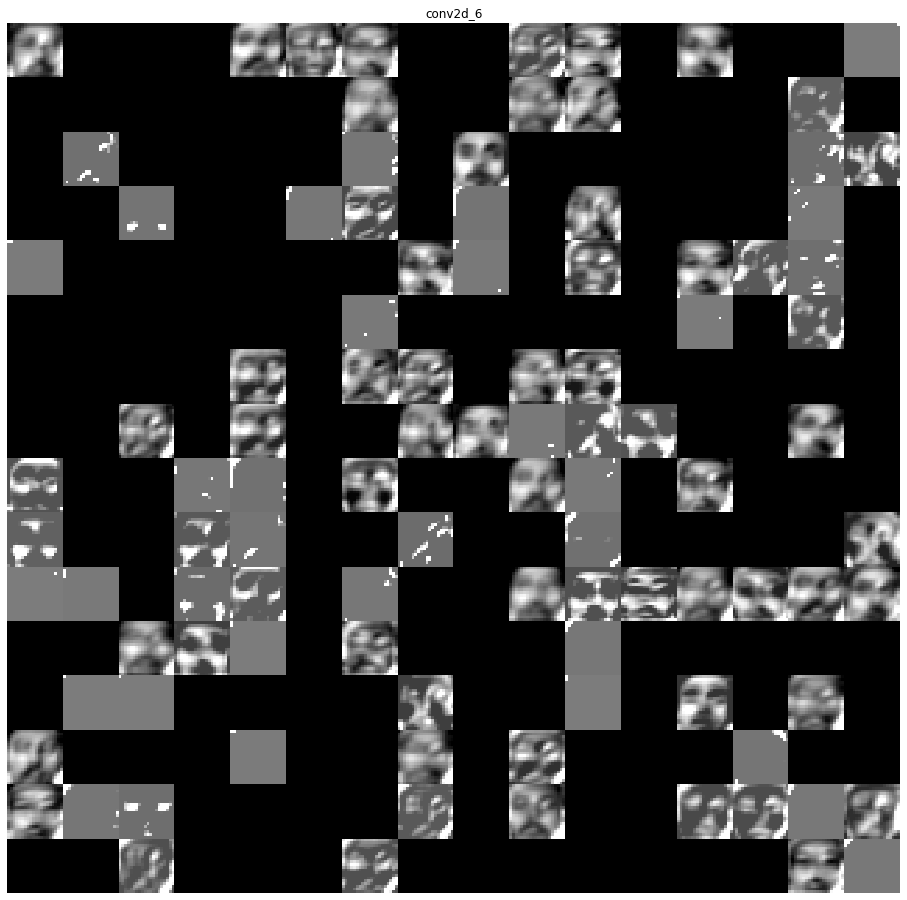

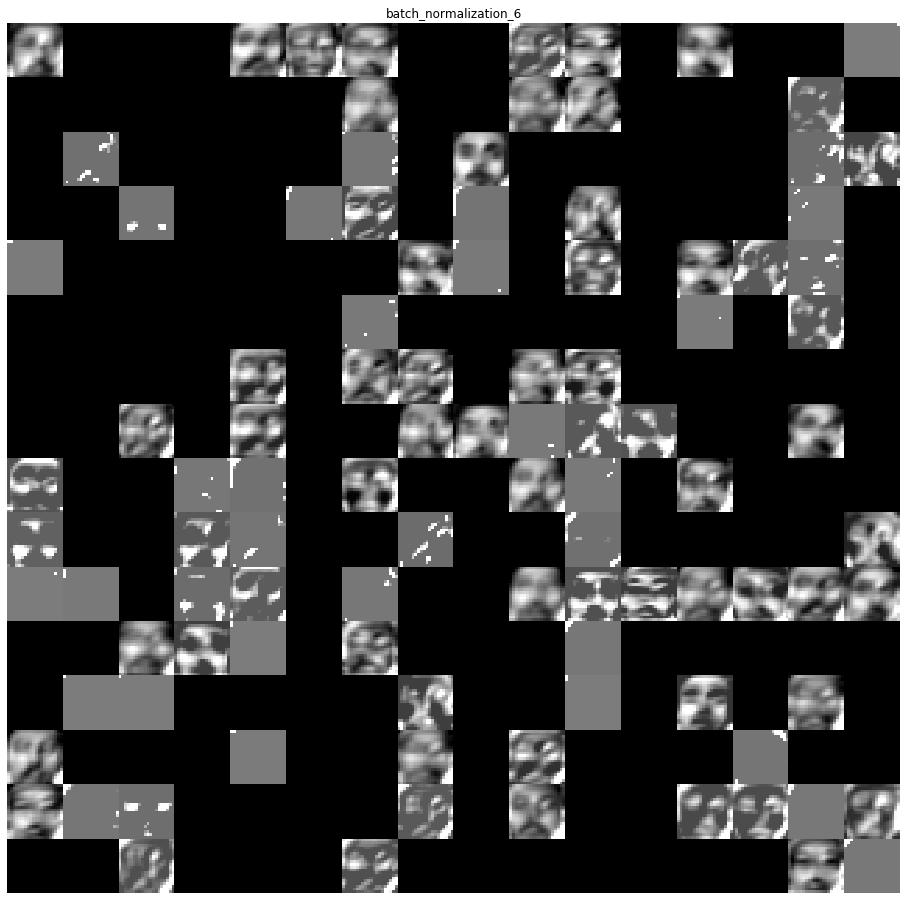

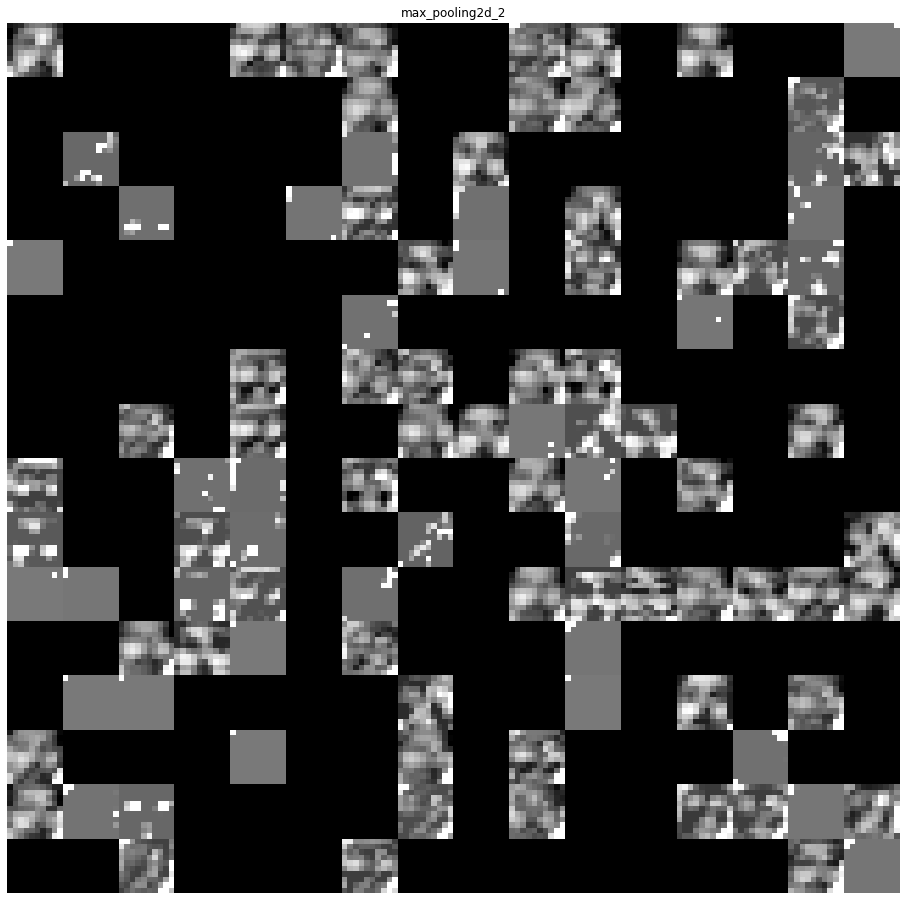

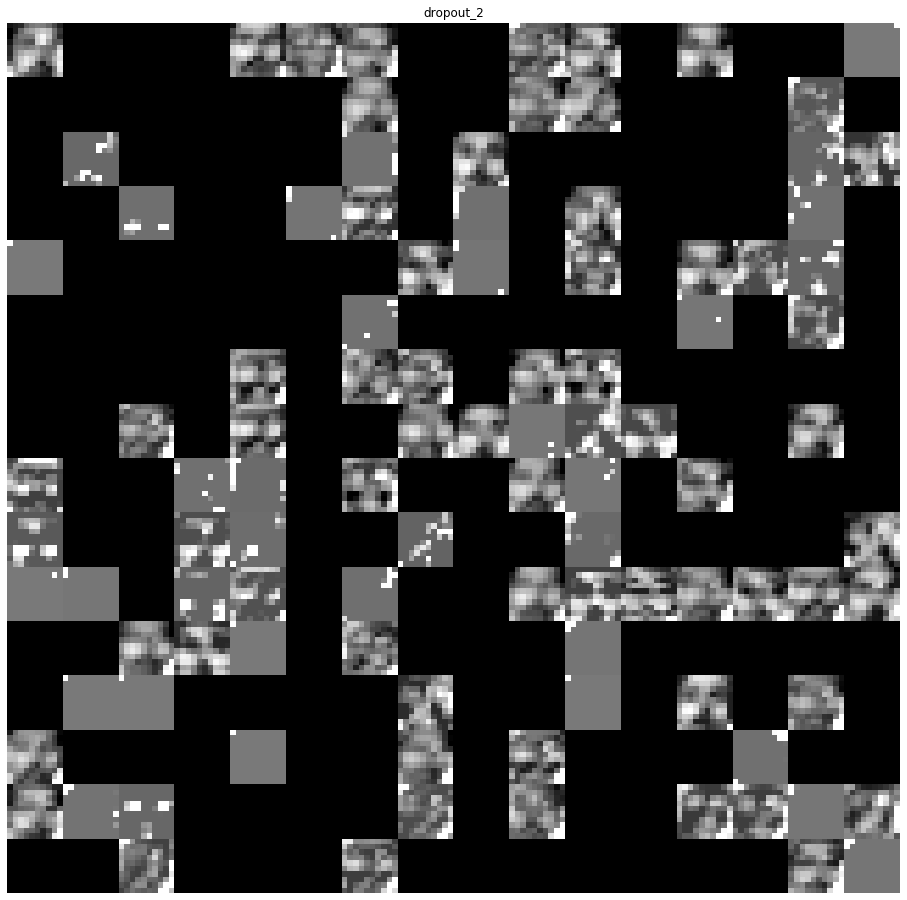

In [ ]:
layer_names = []
for layer in model1.layers[:20]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    plt.savefig(layer_name+'.png')

In [ ]:
#   # serialize model to JSON
# model_json = model1.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

Data Agumentation

In [ ]:
def plot_aug(data,r=5 , c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(data.shape[0])
      plt.imshow(data[rand_n], cmap='gray')
      # plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

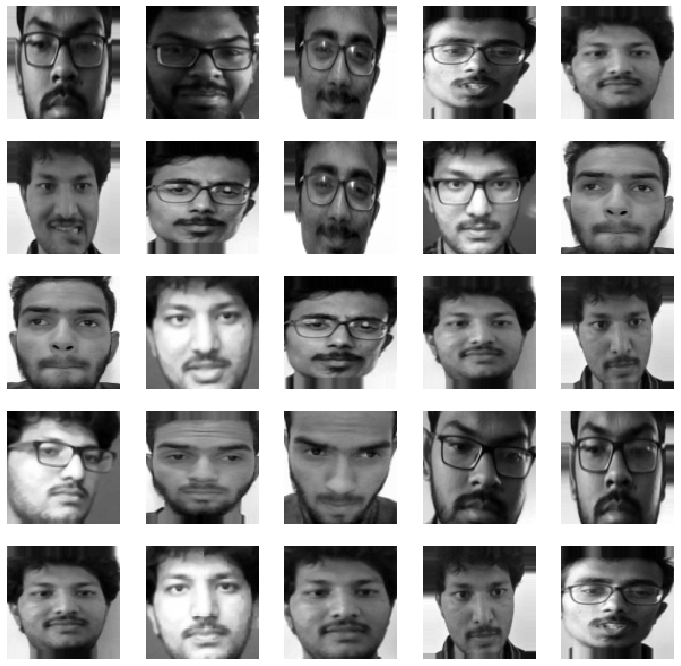

In [ ]:
# plt.imshow(au_x[0], cmap='gray')
# plt.axis('off')
data = ImageDataGenerator(rescale=1./255.,
                                  #  rotation_range=10,
                                  #  width_shift_range=0.25,
                                  #  height_shift_range=0.25,
                                  #  shear_range=0.1,
                                   zoom_range=0.25,
                                  #  horizontal_flip=False
                          ).flow(X_train, y_train)
au_x, au_y = data.next()[0].reshape(32,100,100), data.next()[1]
au_x.shape, au_y.shape
plot_aug(au_x)

##MOdel import 

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('/content/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('/content/0.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.509623   0.42396578 0.00078298 0.01844455 0.04718371]]


In [ ]:
model.save("my_h5_model.h5")